## Cargando los datos

In [32]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import math
import matplotlib.pyplot as plt


df = pd.read_csv("Tasas_de_inter_s_activas_por_tipo_de_cr_dito_20240222.csv")
df.head()

,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,...,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Grupo_Etnico,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,22,INSTITUCIÓN OFICIAL ESPECIAL,8,Fondo Nacional del Ahorro,27/10/2023,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,50539354.0,1,Sin información (1),No aplica(1),FS,Hasta 135 SMLMV,Deudor nuevo en la entidad,10.0,52001.0
1,4,CF-COMPAÑÍA DE FINANCIAMIENTO,117,Credifamilia,01/07/2022,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,66394327.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,BC-ESTABLECIMIENTO BANCARIO,1,Banco de Bogotá,17/11/2023,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,83953304.0,1,Sin información (1),No aplica(1),FS,Hasta 135 SMLMV,Deudor de la entidad,10.0,25175.0
3,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,13/10/2023,Natural,Femenino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,36489064.0,1,Sin información (1),No aplica(1),FS,Hasta 135 SMLMV,Deudor de la entidad,4755.0,41359.0
4,1,BC-ESTABLECIMIENTO BANCARIO,42,Scotiabank Colpatria S.A.,09/12/2022,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,320397727.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explorando el dataset

In [22]:
df.columns

Index(['Tipo_Entidad', 'Nombre_Tipo_Entidad', 'Codigo_Entidad',
       'Nombre_Entidad', 'Fecha_Corte', 'Tipo_de_persona', 'Sexo',
       'Tamaño_de_empresa', 'Tipo_de_crédito', 'Tipo_de_garantía',
       'Producto de crédito', 'Plazo de crédito',
       'Tasa_efectiva_promedio_ponderada', 'margen_adicional',
       'Montos_desembolsados', 'Numero_de_creditos_desembolsados',
       'Grupo_Etnico', 'Antiguedad_de_la_empresa', 'Tipo_de_Tasa',
       'Rango_monto_desembolsado', 'Clase_deudor', 'Codigo_CIIU',
       'Codigo_Municipio'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62593 entries, 0 to 62592
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Tipo_Entidad                      62593 non-null  int64  
 1   Nombre_Tipo_Entidad               62593 non-null  object 
 2   Codigo_Entidad                    62593 non-null  int64  
 3   Nombre_Entidad                    62593 non-null  object 
 4   Fecha_Corte                       62593 non-null  object 
 5   Tipo_de_persona                   62593 non-null  object 
 6   Sexo                              62593 non-null  object 
 7   Tamaño_de_empresa                 62593 non-null  object 
 8   Tipo_de_crédito                   62593 non-null  object 
 9   Tipo_de_garantía                  62593 non-null  object 
 10  Producto de crédito               62593 non-null  object 
 11  Plazo de crédito                  62593 non-null  object 
 12  Tasa

In [24]:
df.notna().sum()

Tipo_Entidad                        62593
Nombre_Tipo_Entidad                 62593
Codigo_Entidad                      62593
Nombre_Entidad                      62593
Fecha_Corte                         62593
Tipo_de_persona                     62593
Sexo                                62593
Tamaño_de_empresa                   62593
Tipo_de_crédito                     62593
Tipo_de_garantía                    62593
Producto de crédito                 62593
Plazo de crédito                    62593
Tasa_efectiva_promedio_ponderada    62593
margen_adicional                    62593
Montos_desembolsados                62593
Numero_de_creditos_desembolsados    62593
Grupo_Etnico                        43260
Antiguedad_de_la_empresa            43260
Tipo_de_Tasa                        43260
Rango_monto_desembolsado            43260
Clase_deudor                        43260
Codigo_CIIU                         43260
Codigo_Municipio                    43260
dtype: int64

In [26]:
def separar_columnas(dataframe):
    """
    Función para separar columnas categóricas de las numéricas.
    
    Entrada:
    dataframe: DataFrame.
    
    Salida:
    columnas_categoricas: Lista de nombres de columnas categóricas.
    columnas_numericas: Lista de nombres de columnas numéricas.
    """
    columnas_categoricas = []
    columnas_numericas = []

    # Iterar sobre cada columna del DataFrame
    for columna in dataframe.columns:
        # Verificar si la columna es de tipo categórico
        if pd.api.types.is_object_dtype(dataframe[columna]):
            columnas_categoricas.append(columna)
        # Si no es categórica, la consideramos numérica
        else:
            columnas_numericas.append(columna)

    return columnas_categoricas, columnas_numericas

columnas_categoricas, columnas_numericas = separar_columnas(df)

print("Columnas Categóricas:", columnas_categoricas)
print("Columnas Numéricas:", columnas_numericas)

Columnas Categóricas: ['Nombre_Tipo_Entidad', 'Nombre_Entidad', 'Fecha_Corte', 'Tipo_de_persona', 'Sexo', 'Tamaño_de_empresa', 'Tipo_de_crédito', 'Tipo_de_garantía', 'Producto de crédito', 'Plazo de crédito', 'Grupo_Etnico', 'Antiguedad_de_la_empresa', 'Tipo_de_Tasa', 'Rango_monto_desembolsado', 'Clase_deudor']
Columnas Numéricas: ['Tipo_Entidad', 'Codigo_Entidad', 'Tasa_efectiva_promedio_ponderada', 'margen_adicional', 'Montos_desembolsados', 'Numero_de_creditos_desembolsados', 'Codigo_CIIU', 'Codigo_Municipio']


In [27]:
def datos_unicos(dataframe):
    """
    Función para mostrar los datos únicos de cada columna.
    
    Entrada:
    dataframe: DataFrame.
    """
    # Iterar sobre cada columna del DataFrame
    for columna in dataframe.columns:
      print(f"Columna: {columna}")
      print(dataframe[columna].unique())
      print("\n")

datos_unicos(df[columnas_categoricas])

Columna: Nombre_Tipo_Entidad
['INSTITUCIÓN OFICIAL ESPECIAL' 'CF-COMPAÑÍA DE FINANCIAMIENTO'
 'BC-ESTABLECIMIENTO BANCARIO' 'COOPERATIVAS DE CARÁCTER FINANCIERO']


Columna: Nombre_Entidad
['Fondo Nacional del Ahorro' 'Credifamilia' 'Banco de Bogotá'
 'Bancolombia' 'Scotiabank Colpatria S.A.' 'BBVA Colombia'
 'Banco Davivienda' 'Banco Caja Social S.A.' 'Banco de Occidente'
 'Banco Popular' 'Confiar' 'AV Villas' 'Cotrafa' 'La Hipotecaria' 'Itaú'
 'Mibanco S.A.' 'Banco Unión' 'Bancoomeva'
 'Caja de Vivienda Militar y de Polícia' 'Banagrario' 'Coofinep'
 'Giros y Finanzas C.F.' 'Cooperativa Financiera de Antioquia']


Columna: Fecha_Corte
['27/10/2023' '01/07/2022' '17/11/2023' '13/10/2023' '09/12/2022'
 '08/09/2023' '21/07/2023' '28/07/2023' '29/07/2022' '24/11/2023'
 '20/10/2023' '03/11/2023' '16/12/2022' '23/09/2022' '05/08/2022'
 '22/12/2023' '10/11/2023' '18/11/2022' '28/10/2022' '07/04/2023'
 '12/08/2022' '01/09/2023' '06/10/2023' '29/09/2023' '31/03/2023'
 '23/06/2023' '07/10/2022'

## Limpiando el dataset
### Eliminamos columnas que no aportaban información relevante

In [33]:
df.drop(columns=['Tipo_Entidad', 'Codigo_Entidad','Tamaño_de_empresa','Tipo_de_crédito','Antiguedad_de_la_empresa','Codigo_CIIU','Codigo_Municipio','Rango_monto_desembolsado','Grupo_Etnico','Tipo_de_Tasa','Clase_deudor','Tipo_de_persona', 'Fecha_Corte'], inplace=True)

In [34]:
df.columns = df.columns.str.lower()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62593 entries, 0 to 62592
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   nombre_tipo_entidad               62593 non-null  object 
 1   nombre_entidad                    62593 non-null  object 
 2   fecha_corte                       62593 non-null  object 
 3   tipo_de_persona                   62593 non-null  object 
 4   sexo                              62593 non-null  object 
 5   tipo_de_garantía                  62593 non-null  object 
 6   producto de crédito               62593 non-null  object 
 7   plazo de crédito                  62593 non-null  object 
 8   tasa_efectiva_promedio_ponderada  62593 non-null  float64
 9   margen_adicional                  62593 non-null  float64
 10  montos_desembolsados              62593 non-null  float64
 11  numero_de_creditos_desembolsados  62593 non-null  int64  
dtypes: f

In [4]:
df.head()

,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,...,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Grupo_Etnico,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,22,INSTITUCIÓN OFICIAL ESPECIAL,8,Fondo Nacional del Ahorro,27/10/2023,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,50539354.0,1,Sin información (1),No aplica(1),FS,Hasta 135 SMLMV,Deudor nuevo en la entidad,10.0,52001.0
1,4,CF-COMPAÑÍA DE FINANCIAMIENTO,117,Credifamilia,01/07/2022,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,66394327.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,BC-ESTABLECIMIENTO BANCARIO,1,Banco de Bogotá,17/11/2023,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,83953304.0,1,Sin información (1),No aplica(1),FS,Hasta 135 SMLMV,Deudor de la entidad,10.0,25175.0
3,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,13/10/2023,Natural,Femenino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,36489064.0,1,Sin información (1),No aplica(1),FS,Hasta 135 SMLMV,Deudor de la entidad,4755.0,41359.0
4,1,BC-ESTABLECIMIENTO BANCARIO,42,Scotiabank Colpatria S.A.,09/12/2022,Natural,Masculino,No aplica,Vivienda,Garantia idónea o no idónea,...,0.0,320397727.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


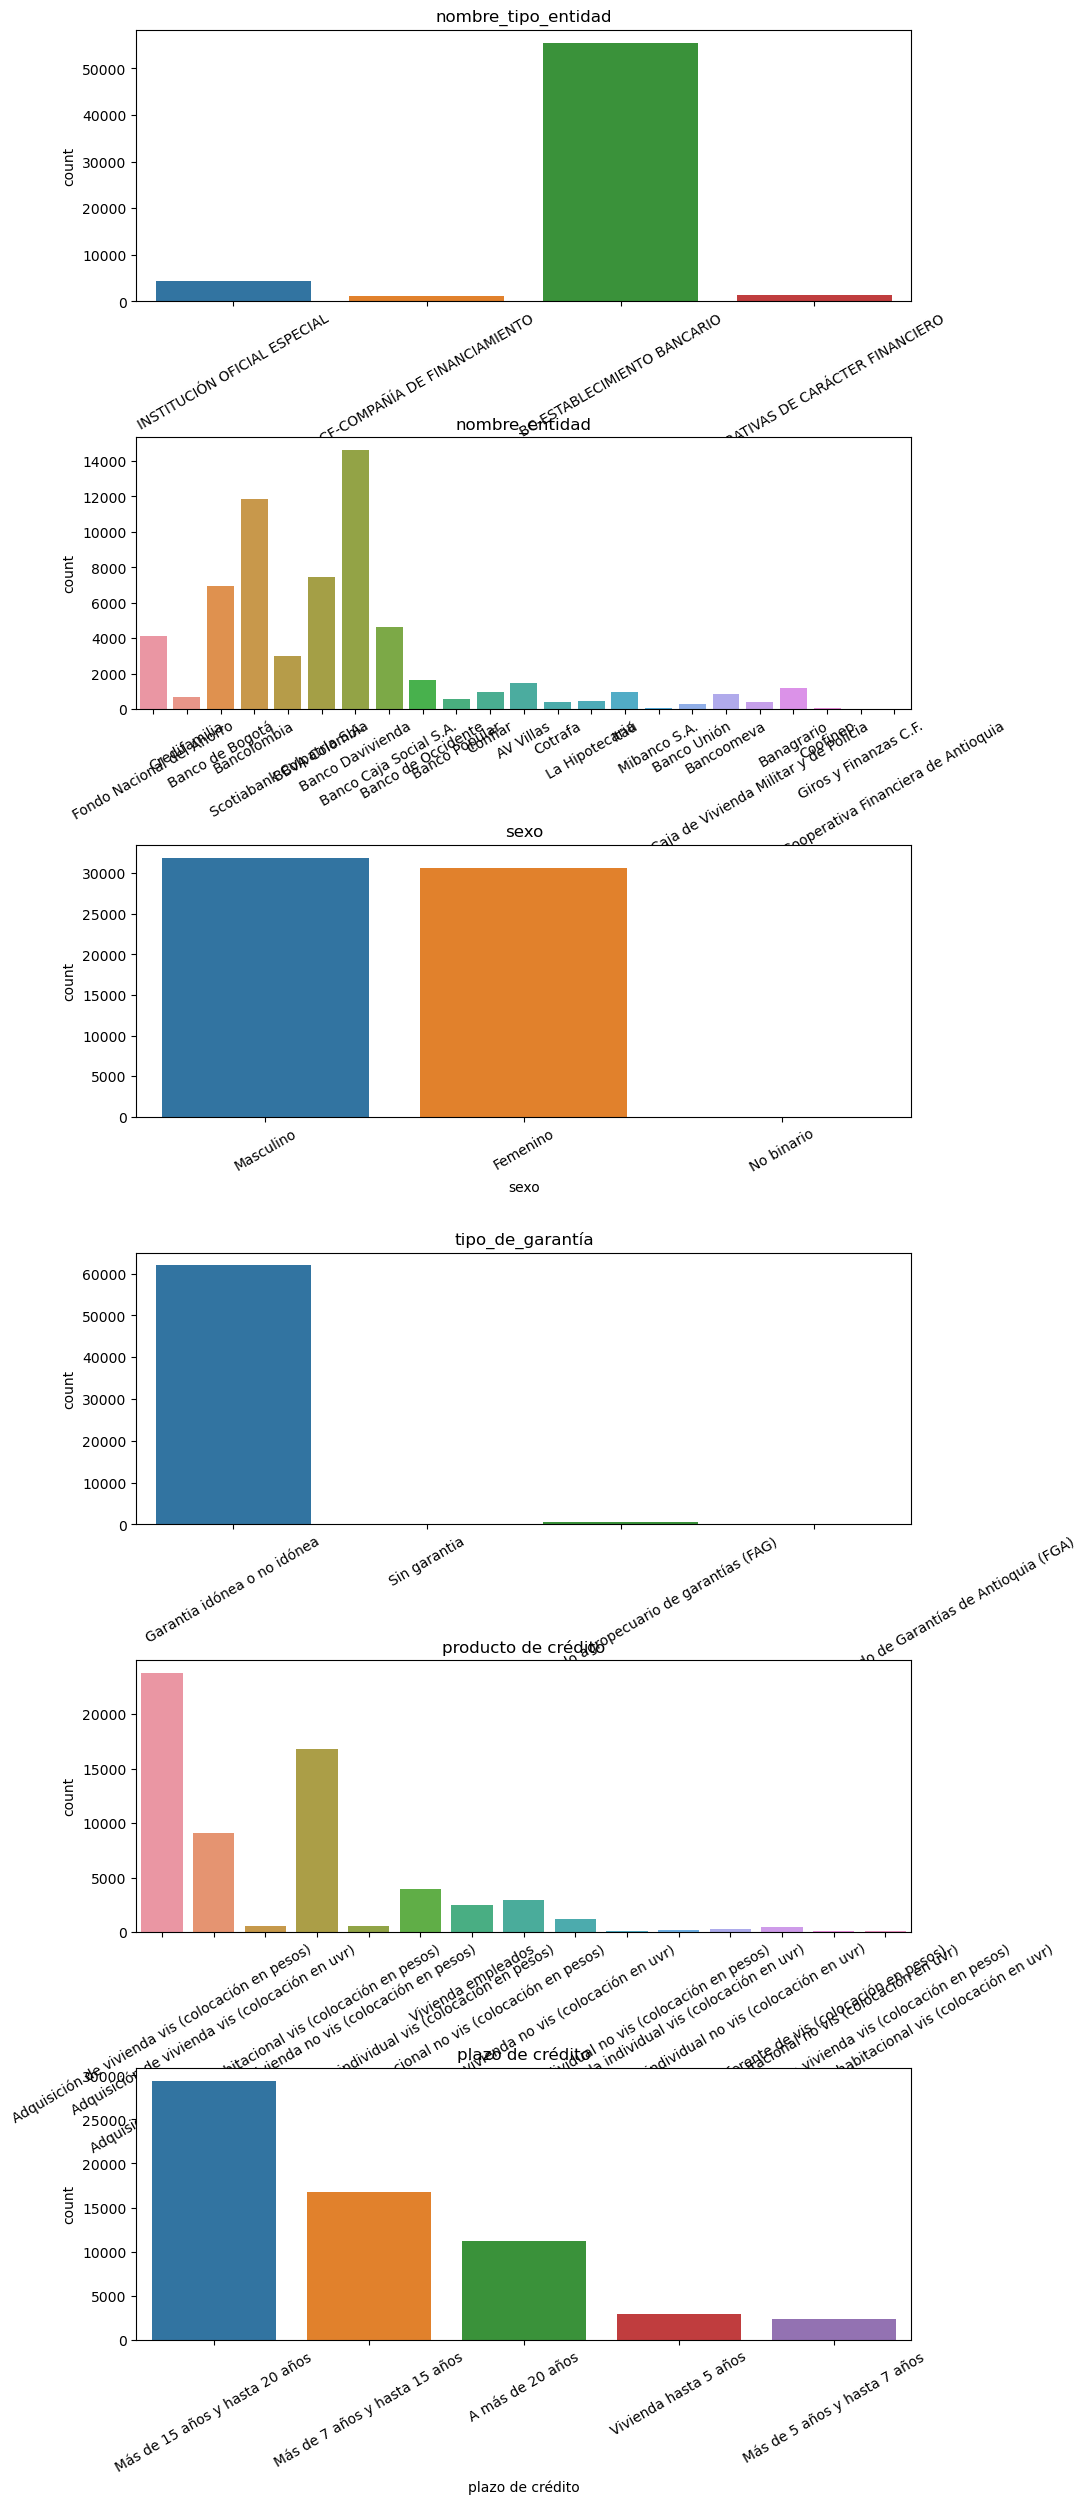

In [35]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat, _ = separar_columnas(df)

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

## Tasa promedio por tipo de entidad financiera

In [36]:
df.groupby(['nombre_tipo_entidad']).tasa_efectiva_promedio_ponderada.mean().sort_values(ascending=False).head()

nombre_tipo_entidad
COOPERATIVAS DE CARÁCTER FINANCIERO    17.072843
CF-COMPAÑÍA DE FINANCIAMIENTO          15.143069
BC-ESTABLECIMIENTO BANCARIO            14.988661
INSTITUCIÓN OFICIAL ESPECIAL            9.850346
Name: tasa_efectiva_promedio_ponderada, dtype: float64

## Tasa promedio por institución oficial

In [37]:
df[df.nombre_tipo_entidad=='INSTITUCIÓN OFICIAL ESPECIAL'].groupby(['nombre_entidad']).tasa_efectiva_promedio_ponderada.mean().sort_values(ascending=False).head()

nombre_entidad
Fondo Nacional del Ahorro                9.852251
Caja de Vivienda Militar y de Polícia    9.829520
Name: tasa_efectiva_promedio_ponderada, dtype: float64

In [38]:
fna_df = df[df['nombre_entidad'] == 'Fondo Nacional del Ahorro']

array([[<Axes: title={'center': 'tasa_efectiva_promedio_ponderada'}>]],
      dtype=object)

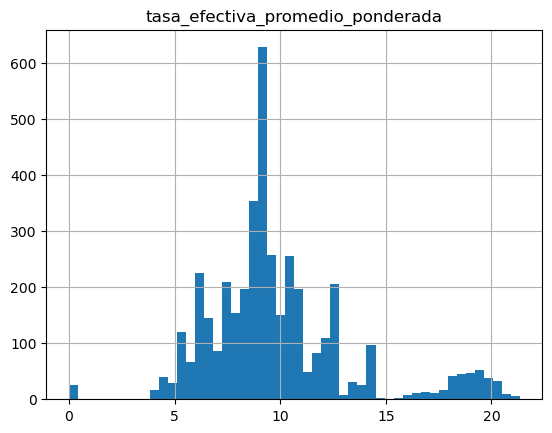

In [39]:
fna_df.hist(column='tasa_efectiva_promedio_ponderada', bins=50)

## Prestamos concedidos por sexo

In [40]:
loan_proportion = df['sexo'].value_counts() / len(df)
print(loan_proportion)


sexo
Masculino     0.509530
Femenino      0.490247
No binario    0.000224
Name: count, dtype: float64


In [41]:
pd.options.display.float_format = '{:,.3f}'.format
df.groupby(['sexo']).montos_desembolsados.mean().sort_values(ascending=False).head()

sexo
Masculino    585,913,875.379
Femenino     529,457,729.520
No binario   143,431,752.429
Name: montos_desembolsados, dtype: float64

<Axes: title={'center': 'tasa_efectiva_promedio_ponderada'}, xlabel='sexo'>

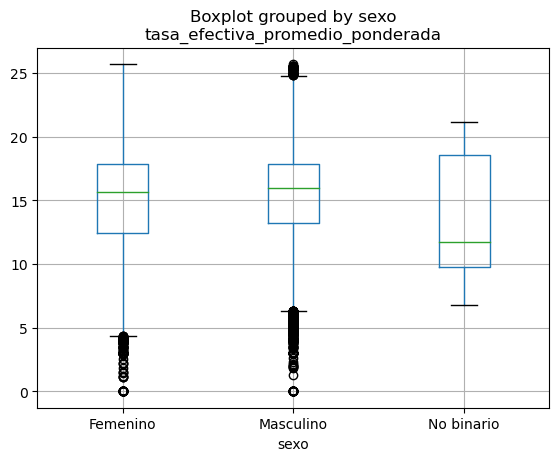

In [42]:
df.boxplot(column='tasa_efectiva_promedio_ponderada', by='sexo', showfliers=True)

In [43]:
mount_mean = df['montos_desembolsados'].mean()
print(mount_mean)

558137477.9937241


## Distribución de la tasa de interes por tipo de entidad

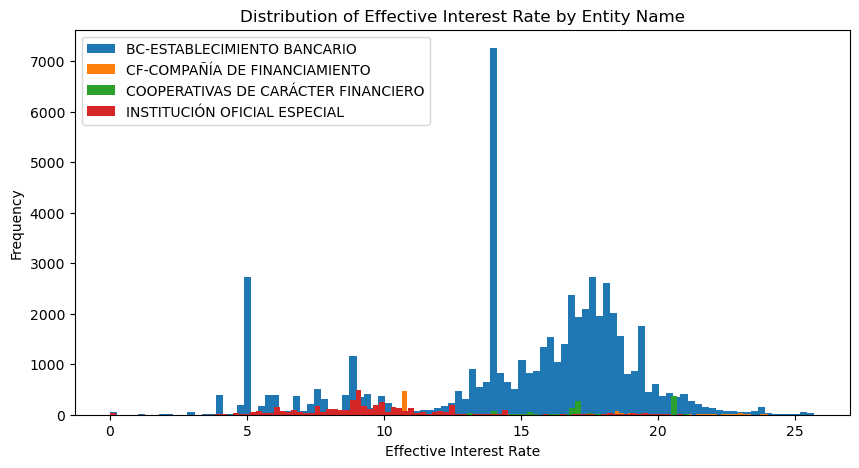

In [44]:


df.groupby('nombre_tipo_entidad')['tasa_efectiva_promedio_ponderada'].plot.hist(bins=100, figsize=(10, 5))
plt.legend()
plt.xlabel('Effective Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Effective Interest Rate by Entity Name')
plt.show()


<Axes: title={'center': 'tasa_efectiva_promedio_ponderada'}, xlabel='nombre_tipo_entidad'>

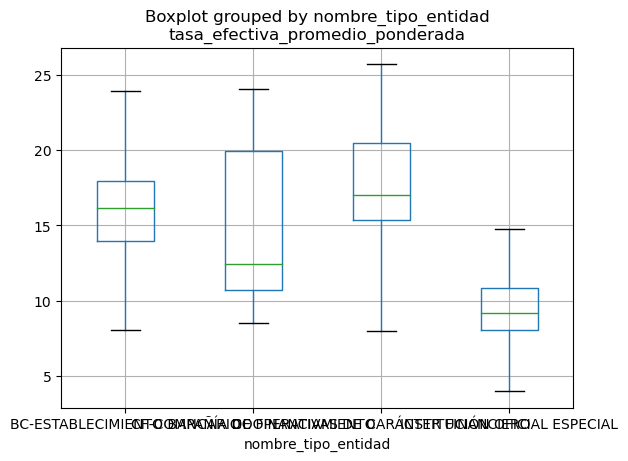

In [45]:
df.boxplot(column='tasa_efectiva_promedio_ponderada', by='nombre_tipo_entidad', showfliers=False)

## Bancos que mas han prestado plata

In [46]:
prestamos_bancos = df.groupby('nombre_entidad')['montos_desembolsados'].agg(['sum']).sort_values(by='sum',ascending=False)
prestamos_bancos

,sum
nombre_entidad,
Banco Davivienda,"9,921,378,480,977.221"
Bancolombia,"7,531,707,482,536.870"
Banco de Bogotá,"3,891,809,405,495.000"
BBVA Colombia,"3,818,857,137,591.840"
Banco Caja Social S.A.,"2,233,536,650,311.000"
Fondo Nacional del Ahorro,"1,975,124,403,161.370"
Scotiabank Colpatria S.A.,"1,827,653,785,298.050"
Banco de Occidente,"1,269,652,699,829.000"
Itaú,"665,680,228,661.230"


## Distribución de la tasa por plazo

array([[<Axes: title={'center': 'A más de 20 años'}>,
        <Axes: title={'center': 'Más de 15 años y hasta 20 años'}>],
       [<Axes: title={'center': 'Más de 5 años y hasta 7 años'}>,
        <Axes: title={'center': 'Más de 7 años y hasta 15 años'}>],
       [<Axes: title={'center': 'Vivienda hasta 5 años'}>, <Axes: >]],
      dtype=object)

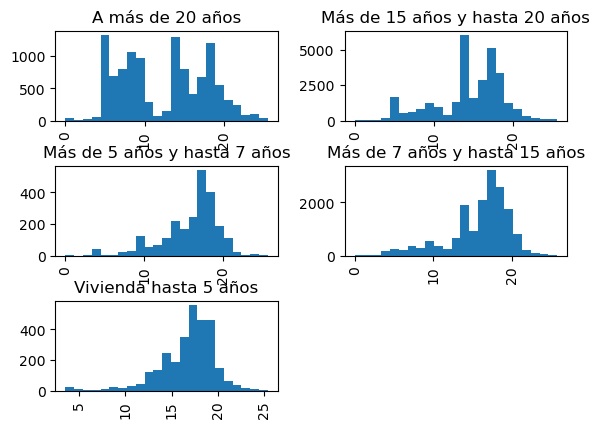

In [47]:

df.hist(column='tasa_efectiva_promedio_ponderada', by='plazo de crédito', bins=23)

## Comportamiento de la tasa por tipo de vivienda

In [49]:
df['no_es_vis'] =  df['producto de crédito'].str.contains(r'\bno vis\b', case=False)
df[['producto de crédito', 'no_es_vis']]

,producto de crédito,no_es_vis
0,Adquisición de vivienda vis (colocación en pesos),False
1,Adquisición de vivienda vis (colocación en pesos),False
2,Adquisición de vivienda vis (colocación en pesos),False
3,Adquisición de vivienda vis (colocación en uvr),False
4,Adquisición de vivienda vis (colocación en pesos),False
...,...,...
62588,Adquisición de vivienda vis (colocación en pesos),False
62589,Adquisición de vivienda vis (colocación en pesos),False
62590,Adquisición de vivienda no vis (colocación en ...,True
62591,Adquisición de vivienda vis (colocación en pesos),False


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

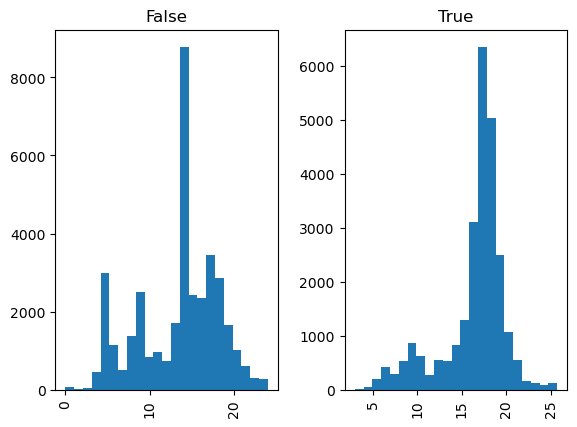

In [50]:
df.hist(column='tasa_efectiva_promedio_ponderada', by='no_es_vis', bins=23)

<Axes: title={'center': 'tasa_efectiva_promedio_ponderada'}, xlabel='no_es_vis'>

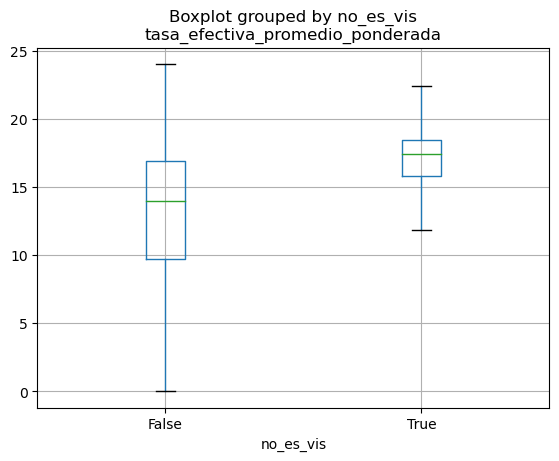

In [51]:
df.boxplot(column='tasa_efectiva_promedio_ponderada', by='no_es_vis', showfliers=False)

/var/folders/h9/q6x8kw494t31g62vmnx7x_d016wvn2/T/ipykernel_94014/931458091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fna_df['no_es_vis'] =  df['producto de crédito'].str.contains(r'\bno vis\b', case=False)


<Axes: title={'center': 'tasa_efectiva_promedio_ponderada'}, xlabel='no_es_vis'>

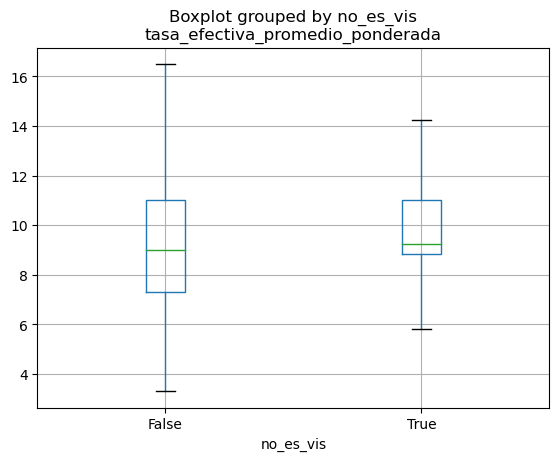

In [54]:
fna_df['no_es_vis'] =  df['producto de crédito'].str.contains(r'\bno vis\b', case=False)
fna_df.boxplot(column='tasa_efectiva_promedio_ponderada', by='no_es_vis', showfliers=False)

In [52]:
from scipy.stats import ttest_ind
# Separate the data into "vis" and "no_vis" groups
vis_df = df[df['no_es_vis'] == False]
no_vis_df = df[df['no_es_vis'] == True]

# Perform the t-test
t_stat, p_value = ttest_ind(vis_df['tasa_efectiva_promedio_ponderada'].dropna(), no_vis_df['tasa_efectiva_promedio_ponderada'].dropna())

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Hay una diferencia significativa en las tasas de interes de viviendas vis y no_vis.")
else:
    print("No hay una diferencia significativa en las tasas de interes de viviendas vis y no_vis.")


Hay una diferencia significativa en las tasas de interes de viviendas vis y no_vis.


In [55]:
from scipy.stats import ttest_ind
# Separate the data into "vis" and "no_vis" groups
vis_df = fna_df[fna_df['no_es_vis'] == False]
no_vis_df = fna_df[fna_df['no_es_vis'] == True]

# Perform the t-test
t_stat, p_value = ttest_ind(vis_df['tasa_efectiva_promedio_ponderada'].dropna(), no_vis_df['tasa_efectiva_promedio_ponderada'].dropna())

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Hay una diferencia significativa en las tasas de interes de viviendas vis y no_vis.")
else:
    print("No hay una diferencia significativa en las tasas de interes de viviendas vis y no_vis.")


Hay una diferencia significativa en las tasas de interes de viviendas vis y no_vis.
